In [1]:
import sys

sys.path.append('..')
from src.utils.factory import read_yaml
from src.dataset.dataset import MakeDataset
from src.models.networks import read_model
from src.ntk.generate import generate_ntk
from src.tools.train import train
from src.ntk.learning_curve import LearningCurve
from src.utils.visualize import visualize

/home/kwatanabe/miniconda3/envs/rnf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read Setting

In [2]:
cfg = read_yaml(fpath='../src/config/config.yaml')

### Prepare dataset

In [3]:
database = MakeDataset(cfg)
# get data (numpy.array)
ar_X_tr, ar_X_te, ar_y_tr, ar_y_te = database.get_array()
# get data (torch.tensor)
te_X_tr, te_X_te, te_y_tr, te_y_te = database.get_tensor()

### Read model

In [4]:
net = read_model(cfg)

### Calculate optimal learning rate

In [5]:
lr = generate_ntk(net, 0, te_X_tr, te_X_te, cfg, calc_lr=True)

100%|██████████| 80/80 [00:00<00:00, 184.64it/s]


### Train model

In [6]:
f_train_0, f_test_0, results = train(cfg, net, lr, database)

Epoch[1/1000], TrainLoss: 0.1610, TestLoss: 0.1538, TestAcc: 0.0000
Epoch[2/1000], TrainLoss: 0.1605, TestLoss: 0.1533, TestAcc: 0.0000
Epoch[3/1000], TrainLoss: 0.1599, TestLoss: 0.1527, TestAcc: 0.0000
Epoch[4/1000], TrainLoss: 0.1593, TestLoss: 0.1522, TestAcc: 0.0000
Epoch[5/1000], TrainLoss: 0.1587, TestLoss: 0.1516, TestAcc: 0.0000
Epoch[6/1000], TrainLoss: 0.1581, TestLoss: 0.1510, TestAcc: 0.0000
Epoch[7/1000], TrainLoss: 0.1576, TestLoss: 0.1505, TestAcc: 0.0000
Epoch[8/1000], TrainLoss: 0.1570, TestLoss: 0.1499, TestAcc: 0.0000
Epoch[9/1000], TrainLoss: 0.1564, TestLoss: 0.1494, TestAcc: 0.0000
Epoch[10/1000], TrainLoss: 0.1559, TestLoss: 0.1489, TestAcc: 0.0000
Epoch[11/1000], TrainLoss: 0.1553, TestLoss: 0.1483, TestAcc: 0.0000
Epoch[12/1000], TrainLoss: 0.1547, TestLoss: 0.1478, TestAcc: 0.0000
Epoch[13/1000], TrainLoss: 0.1542, TestLoss: 0.1472, TestAcc: 0.0000
Epoch[14/1000], TrainLoss: 0.1536, TestLoss: 0.1467, TestAcc: 0.0000
Epoch[15/1000], TrainLoss: 0.1531, TestLoss

### Generate NTK

In [7]:
NTK_train, NTK_test = generate_ntk(net, 0, te_X_tr, te_X_te, cfg)

100%|██████████| 20/20 [00:02<00:00,  9.13it/s]


### Make learning curve by using NTK

In [8]:
lc_base = LearningCurve(cfg, lr, NTK_train, ar_y_tr, f_train_0, f_test_0)
ntk_train_results = lc_base.train_curve()
ntk_test_results = lc_base.test_curve(NTK_test, ar_y_te)

100%|██████████| 1000/1000 [00:00<00:00, 5775.51it/s]


In [9]:
# merge two dicts
ntk_results = ntk_train_results | ntk_test_results

### Visualize

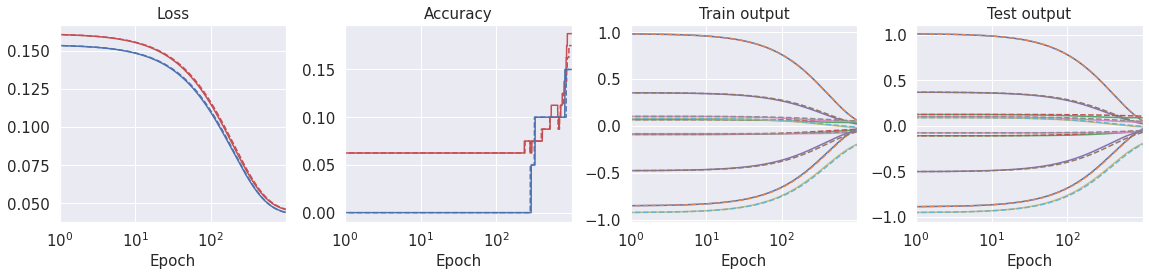

In [10]:
visualize(cfg, results, ntk_results, ar_y_tr, ar_y_te, 0)